In [1]:
import cv2 as cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


import matplotlib.animation as animation

def l2n(x):
    return np.array(x)

def cropImage(img,x0,y0,width,height):
    return img[y0:y0+height,x0:x0+width,:]

def rebin(arr,new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1],
             new_shape[2], arr.shape[2] // new_shape[2])
    
    return arr.reshape(shape).mean(-1).mean(1).mean(2)

def timeToSec(timeStr):#Transform m:s format into total number of seconds
    timeArr = timeStr.split(':')
    timeMin = int(timeArr[0])
    timeSec = int(timeArr[1])
    totSec = timeMin*60+timeSec
    return totSec


def animateTrajOnFrame(frm):

    ax.cla()
    
    #Speed up using frameskip
    for i in range(frameSkip):
        ret, img = video.read()
    
    if(ret): #if succesfffuly read an image
        frameNum = video.get(cv2.CAP_PROP_POS_FRAMES)

        cond  =  dfS.frame<frameNum            

        dfSC = dfS[cond]

        ax.imshow(img,vmin=0, vmax=255,cmap='gray')
        drawCirclesDf(fno1,ax)
        drawCirclesDf(fno2,ax)
        drawCirclesDf(fno3,ax)
        if len(dfSC)>0 :
            tp.plot_traj(dfSC,ax = ax)#,plot_style={'linewidth':12,'alpha':0.4,'color':'cyan','solid_capstyle':'round'})
    ax.axis('off')
def drawCirclesDf(df,ax):
    
    
    for index, row in df.iterrows():
        x,y,r = row.x,row.y,row.r
        #circle = plt.Circle((x, y), r, color='r',fill=False)
        circle = plt.Circle((x, y), r, color='r',fill=False)
        ax.add_patch(circle)

def circlesToDataFrame(circles,frameNum):    
    x,y,r = parseCircles(circles)
    data = {'frame':[int(frameNum)]*len(circles),'x':x,'y':y,'r':r}
    dft = pd.DataFrame(data = data)
    
    return dft

def drawCircles(circles,ax ):
    if circles is not None:  
    # Convert the circle parameters a, b and r to integers.
    #detected_circles = np.uint16(np.around(detected_circles))
    #fig, ax = plt.subplots() 
        for pt in circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
            circle = plt.Circle((a, b), r, color='r',fill=False)
            ax.add_patch(circle)

In [2]:
expSumFileName = 'C:\\Users\\User\\Documents\\Eden\\locate_git_code\\two_circles_exp\\two_circles_exp5.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
#expSum=expSum[(expSum['date']==20231212)]
expSum=expSum.iloc[range(52,75)]

In [3]:
#speep up and scaling of minified video
scaleDownFactor = 4
speedUpFactor = 5

#Controlling the output file

#How many frames to skip (speed up and smaller files)
frameSkip = 10

#Figure size:
figsize = 3
# Output stream bitrate
bitrate = 1800

In [4]:
smallVideoSuffix = '_small.mp4'
trajVideoSuffix = '_traj.mp4'

Plotting trajectory from
	D:\Eden\new_exp_test_15_11_23\15_4_24\C0730.MP4_locatedFull20240416_bot_Eden.csv_linked.csv
	onto video file:	D:\Eden\new_exp_test_15_11_23\15_4_24\C0730.MP4_small.mp4
	Saving to file:	D:\Eden\new_exp_test_15_11_23\15_4_24\C0730.MP4_small.mp4_traj.mp4
	plotting trajectory on 867 frames took + 56.20964336395264 seconds.
Plotting trajectory from
	D:\Eden\new_exp_test_15_11_23\15_4_24\C0731.MP4_locatedFull20240416_bot_Eden.csv_linked.csv
	onto video file:	D:\Eden\new_exp_test_15_11_23\15_4_24\C0731.MP4_small.mp4
	Saving to file:	D:\Eden\new_exp_test_15_11_23\15_4_24\C0731.MP4_small.mp4_traj.mp4
	plotting trajectory on 1067 frames took + 68.71330189704895 seconds.
Plotting trajectory from
	D:\Eden\new_exp_test_15_11_23\15_4_24\C0732.MP4_locatedFull20240416_bot_Eden.csv_linked.csv
	onto video file:	D:\Eden\new_exp_test_15_11_23\15_4_24\C0732.MP4_small.mp4
	Saving to file:	D:\Eden\new_exp_test_15_11_23\15_4_24\C0732.MP4_small.mp4_traj.mp4
	plotting trajectory on 848

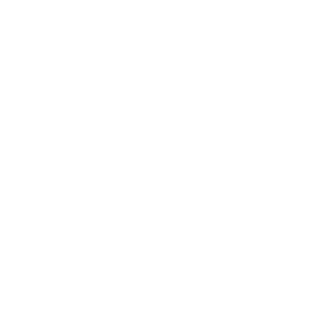

In [7]:
totalTimeStart = time.time()

fig,ax  = plt.subplots(figsize=(figsize,figsize),frameon=False)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
for index,row in expSum.iterrows():
    startTime = time.time()
    ############## Fetch experiments data #################
    fileNameVideo = row['path']+smallVideoSuffix
    fileNameOutput = fileNameVideo + trajVideoSuffix
    fileNameLinked1=row.FirstDiameterLocatingFile
    fileNameLinked2=row.SecondDiameterLocatingFile
    fileNameLinked3=row.ThirdDiameterLocatingFile
    fileNameLinked =row.linkingFileName
    #fileNameLinked = 'D:\\Eden\\new_exp_test_15_11_23\\30_11_23\\fronters\\C0634.MP4_locatedFull20231203_bot_Eden.csv_linked.csv'

    print('Plotting trajectory from')
    print('\t'+fileNameLinked)
    print('\tonto video file:\t' + fileNameVideo)
    print('\tSaving to file:\t' + fileNameOutput)


    video = cv2.VideoCapture(fileNameVideo)
    # Load locating file
    df = pd.read_csv(fileNameLinked)
    
    fno1=pd.read_csv(fileNameLinked1)
    fno1=fno1.iloc[[-1]]
    fno2=pd.read_csv(fileNameLinked2)
    fno2=fno2.iloc[[-1]]
    fno3=pd.read_csv(fileNameLinked3)
    fno3=fno3.iloc[[-1]]
    #Read video paramters
    fps = video.get(cv2.CAP_PROP_FPS)
    totalFrameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    #Compute start/end frame of original video
    startMin =row.start_min
    endMin =row.end_min
    startSec = timeToSec(startMin)
    endSec = timeToSec(endMin)
    startFrame = int(startSec*fps)
    endFrame = int(endSec*fps)

    #Shift the data of the linked file to match the minified Video
    dfS = df.copy() #this will be the resacled ans shifted linkin data relative to the minified video
    dfS.frame-=startFrame
    dfS = dfS[dfS.frame>=0]

    dfS.frame/=speedUpFactor
    dfS.x /=scaleDownFactor
    dfS.y /=scaleDownFactor
    dfS.r /=scaleDownFactor
    '''
    fnos1=fno1.copy()
    fnos1.frame-=startFrame
    fnos1 = fnos1[fnos1.frame>=0]
    fnos2=fno2.copy()
    fnos2.frame-=startFrame
    fnos2 = fnos2[fnos2.frame>=0]
    fnos3=fno3.copy()
    fnos3.frame-=startFrame
    fnos3 = fnos3[fnos3.frame>=0]
    fnos1.frame/=speedUpFactor
    fnos2.frame/=speedUpFactor
    fnos3.frame/=speedUpFactor
    
    
    fnos1.x /=scaleDownFactor
    fnos1.y /=scaleDownFactor
    fnos1.r /=scaleDownFactor
    fnos2.x /=scaleDownFactor
    fnos2.y /=scaleDownFactor
    fnos2.r /=scaleDownFactor
    fnos3.x /=scaleDownFactor
    fnos3.y /=scaleDownFactor
    fnos3.r /=scaleDownFactor
    '''
    fno1.x /=scaleDownFactor
    fno1.y /=scaleDownFactor
    fno1.r /=scaleDownFactor
    fno2.x /=scaleDownFactor
    fno2.y /=scaleDownFactor
    fno2.r /=scaleDownFactor
    fno3.x /=scaleDownFactor
    fno3.y /=scaleDownFactor
    fno3.r /=scaleDownFactor
    
    framesToShow = range(0,totalFrameCount,frameSkip)

    Writer = animation.writers['ffmpeg'];
    writer = Writer(fps=fps, metadata=dict(artist='MYBZ'), bitrate=bitrate)

    
    video.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ani = mpl.animation.FuncAnimation(fig, animateTrajOnFrame,frames=framesToShow);#, frames=datesToPlot, repeat=True)
    ani.save(fileNameOutput, writer=writer)#,savefig_kwargs={'pad_inches':0,'bbox_inches':'tight'});
    #,bbox_inches='tight', transparent="True", pad_inches=0)
    endTime = time.time()
    duration=endTime-startTime
    print('\tplotting trajectory on ' + str(len(framesToShow)) +' frames took + ' +str(duration) + ' seconds.')
    
totalTimeEnd = time.time()
durationTotal = totalTimeEnd-totalTimeStart
print('\nTotal tile for saving trajectories on '+ str(len(expSum)) + ' videos was ' +str(durationTotal/60) + ' minutes')